# Módelo presa-depredador

El modelo presa-depredador es un sistema dinámico que describe las interacciones entre dos especies: la presa, que es consumida por el depredador. Se formula comúnmente usando ecuaciones diferenciales, como el modelo de Lotka-Volterra, que describe cómo cambian las poblaciones de presa y depredador con el tiempo.

## Modelo analítico

x(t): Representa a la presa
y(t): Representa al depredador

### Ecuaciones:

$x'(t)=r_1x(t)-d_1x(t)y(t)$

$y'(t)=-r_2y(t)+d_2x(t)y(t)$

donde:

$r_1$:Taza de aumento de presas en ausencia de depredadores 

$r_2$: Taza de disminución de depredadores en ausencia de presa

$d_1$: Suceptibilidad de las presas a ser cazadas

$d_2$: Capacidad de depredación de los depredadores

## Ejemplo

$r_1= 0.4$     :Tasa de crecimiento de la presa (x) en ausencia de depredadores.

$r_2 = 0.3$       :Tasa de depredación que reduce la población de presas debido a la presencia de depredadores.

$d_1 = 0.37$     :Tasa de muerte de los depredadores en ausencia de presas.

$d_2 = 0.05$     :Tasa de crecimiento de los depredadores gracias a la caza de presas.

### Parametros iniciales del sistema

$x(0)=3$

$y(0)=1$

## Runge Kutta de orden 4

t = 0.00, x = 3.0000, y = 1.0000
t = 0.01, x = 3.0030, y = 0.9978
t = 0.02, x = 3.0060, y = 0.9956
t = 0.03, x = 3.0091, y = 0.9934
t = 0.04, x = 3.0122, y = 0.9913
t = 0.05, x = 3.0153, y = 0.9891
t = 0.06, x = 3.0184, y = 0.9869
t = 0.07, x = 3.0216, y = 0.9848
t = 0.08, x = 3.0247, y = 0.9826
t = 0.09, x = 3.0279, y = 0.9805
t = 0.10, x = 3.0311, y = 0.9783
t = 0.11, x = 3.0344, y = 0.9762
t = 0.12, x = 3.0376, y = 0.9741
t = 0.13, x = 3.0409, y = 0.9719
t = 0.14, x = 3.0442, y = 0.9698
t = 0.15, x = 3.0476, y = 0.9677
t = 0.16, x = 3.0509, y = 0.9656
t = 0.17, x = 3.0543, y = 0.9635
t = 0.18, x = 3.0577, y = 0.9614
t = 0.19, x = 3.0611, y = 0.9593
t = 0.20, x = 3.0646, y = 0.9573
t = 0.21, x = 3.0680, y = 0.9552
t = 0.22, x = 3.0715, y = 0.9531
t = 0.23, x = 3.0750, y = 0.9511
t = 0.24, x = 3.0786, y = 0.9490
t = 0.25, x = 3.0821, y = 0.9470
t = 0.26, x = 3.0857, y = 0.9449
t = 0.27, x = 3.0893, y = 0.9429
t = 0.28, x = 3.0930, y = 0.9409
t = 0.29, x = 3.0966, y = 0.9388
t = 0.30, 

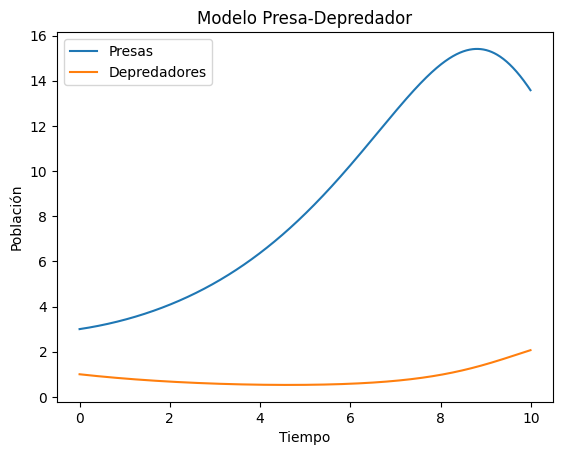

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def f_x(x, y, t, a, b):
    return a * x - b * x * y

def f_y(x, y, t, c, d):
    return -c * y + d * x * y 

def runge_kutta_4th_order_system(f_x, f_y, t0, x0, y0, h, n, a, b, c, d):
    """
    Implementa el método de Runge-Kutta de 4to orden para un sistema de ecuaciones.

    Parámetros:
    f_x : función
        La función que define dx/dt.
    f_y : función
        La función que define dy/dt.
    t0 : float
        El valor inicial de t.
    x0 : float
        El valor inicial de x.
    y0 : float
        El valor inicial de y.
    h : float
        El tamaño del paso.
    n : int
        El número de pasos a calcular.
    a, b, c, d : float
        Parámetros del sistema.

    Retorna:
    t_values : list
        Lista de valores de t.
    x_values : list
        Lista de valores de x correspondientes.
    y_values : list
        Lista de valores de y correspondientes.
    """
    t_values = np.zeros(n)
    x_values = np.zeros(n)
    y_values = np.zeros(n)

    t_values[0] = t0
    x_values[0] = x0
    y_values[0] = y0
    
    for i in range(1, n):
        t = t_values[i - 1]
        x = x_values[i - 1]
        y = y_values[i - 1]
        
        k1_x = h * f_x(x, y, t, a, b)
        k1_y = h * f_y(x, y, t, c, d)
        
        k2_x = h * f_x(x + k1_x/2, y + k1_y/2, t + h/2, a, b)
        k2_y = h * f_y(x + k1_x/2, y + k1_y/2, t + h/2, c, d)
        
        k3_x = h * f_x(x + k2_x/2, y + k2_y/2, t + h/2, a, b)
        k3_y = h * f_y(x + k2_x/2, y + k2_y/2, t + h/2, c, d)
        
        k4_x = h * f_x(x + k3_x, y + k3_y, t + h, a, b)
        k4_y = h * f_y(x + k3_x, y + k3_y, t + h, c, d)
        
        x_values[i] = x + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y_values[i] = y + (1/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
        t_values[i] = t + h
    
    return t_values, x_values, y_values

# Parámetros del sistema
a = 0.4     # Tasa de crecimiento de la presa (x) en ausencia de depredadores.
b = 0.3       # Tasa de depredación que reduce la población de presas debido a la presencia de depredadores.
c = 0.37     # Tasa de muerte de los depredadores en ausencia de presas.
d = 0.05     # Tasa de crecimiento de los depredadores gracias a la caza de presas.

# Valores iniciales
t0 = 0
x0 = 3     # La población inicial de presas (x)
y0 = 1     # La población inicial de depredadores (y)
h = 0.01
n = 1000

# Llamada a la función RK4 para sistemas
t_values, x_values, y_values = runge_kutta_4th_order_system(f_x, f_y, t0, x0, y0, h, n, a, b, c, d)

# Imprimir resultados
for t, x, y in zip(t_values, x_values, y_values):
    print(f"t = {t:.2f}, x = {x:.4f}, y = {y:.4f}")

plt.plot(t_values, x_values, label='Presas')
plt.plot(t_values, y_values, label='Depredadores')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo Presa-Depredador')
plt.show()


# Programación por agentes

El programa se para al llegar a 20 conejos en el sistema


La aproximación del número de presas en el sistema:  13.705

La aproximación del número de depredadores en el sistema:  0.06


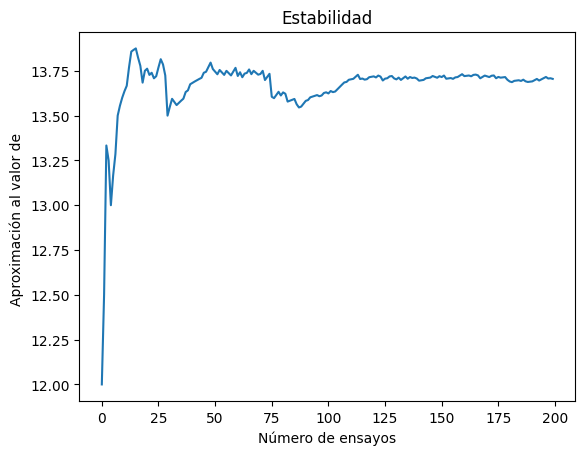

In [27]:
import random
import copy as cp
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo basado en agentes
nr = 15.0  # Capacidad de carga de conejos
r_init = 3  # Población inicial de conejos
mr = 0.3  # Magnitud del movimiento de los conejos
dr = 1  # Tasa de mortalidad de los conejos cuando se enfrentan a los zorros
rr = 0.4  # Tasa de reproducción de los conejos

f_init = 1  # Población inicial de zorros
mf = 0.05  # Magnitud del movimiento de los zorros
df = 0.37  # Tasa de mortalidad de los zorros cuando no hay comida
rf = 0.05  # Tasa de reproducción de los zorros
cd = 0.1  # Radio para detección de colisiones
cdsq = cd ** 2

class agent:
    pass

def initialize():
    global agents, rdata, fdata
    agents = []
    rdata = []
    fdata = []
    for i in range(r_init + f_init):
        ag = agent()
        ag.type = 'r' if i < r_init else 'f'
        ag.x = random.random()
        ag.y = random.random()
        agents.append(ag)

def update_one_agent():
    global agents
    if agents == []:
        return

    ag = random.choice(agents)

    # Simulación de movimiento aleatorio
    m = mr if ag.type == 'r' else mf
    ag.x += random.uniform(-m, m)
    ag.y += random.uniform(-m, m)
    ag.x = 1 if ag.x > 1 else 0 if ag.x < 0 else ag.x
    ag.y = 1 if ag.y > 1 else 0 if ag.y < 0 else ag.y

    # Detección de colisiones y simulación de muerte o nacimiento
    neighbors = [nb for nb in agents if nb.type != ag.type
                 and (ag.x - nb.x)**2 + (ag.y - nb.y)**2 < cdsq]

    if ag.type == 'r':
        if len(neighbors) > 0:  # Si hay zorros cerca
            if random.random() < dr:
                agents.remove(ag)
                return
        if random.random() < rr*(1-sum([1 for x in agents if x.type == 'r'])/nr):
            agents.append(cp.copy(ag))
    else:
        if len(neighbors) == 0:  # Si no hay conejos cerca
            if random.random() < df:
                agents.remove(ag)
                return
        else:  # Si hay conejos cerca
            if random.random() < rf:
                agents.append(cp.copy(ag))

def update():
    global agents, rdata, fdata
    t = 0.0
    rabbit_count = 0  # Inicialización de rabbit_count
    while t < 1.0 and len(agents) > 0:
        t += 1.0 / len(agents)
        update_one_agent()

        # Detener la simulación si se alcanza la capacidad máxima de conejos
        rabbit_count = sum([1 for x in agents if x.type == 'r'])
        if rabbit_count >= nr:
            break

    rdata.append(rabbit_count)
    fdata.append(sum([1 for x in agents if x.type == 'f']))

class NonGUISimulator:
    def __init__(self, init_func, update_func, iterations):
        self.init_func = init_func
        self.update_func = update_func
        self.iterations = iterations
        self.rdata = []
        self.fdata = []

    def run_simulation(self):
        self.init_func()  # Inicializa el modelo
        for i in range(self.iterations):
            self.update_func()  # Ejecuta un paso del modelo
            # Detener la simulación si se alcanza la capacidad máxima de conejos
            if len(self.rdata) > 0 and self.rdata[-1] >= nr:
                break
        self.rdata = rdata
        self.fdata = fdata

def simulacion():
    # Parámetros de simulación
    iterations = 10

    # Crea un objeto del simulador sin GUI
    simulator = NonGUISimulator(initialize, update, iterations)

    # Corre la simulación
    simulator.run_simulation()

    all_rdata = []
    all_fdata = []

    all_rpromedio = []
    all_fpromedio = []

    for i in range(num_simulations):
        simulator = NonGUISimulator(initialize, update, iterations)
        simulator.run_simulation()
        all_rdata.append(simulator.rdata[-1])
        all_fdata.append(simulator.fdata[-1])
    
    return all_rdata, all_fdata

def estabilidad_simulacion(ensayos, area):
    plt.plot(ensayos, area)
    plt.title("Estabilidad")
    plt.xlabel('Número de ensayos')
    plt.ylabel('Aproximación al valor de ')
    plt.show()




# Analiza los resultados
num_simulations = 200
# Estabilidad de la aproximación
ensayos1 = range(0, num_simulations)
simu = []

all_rdata = []
all_fdata = []
all_rpromedio = []
all_fpromedio = []

# Analiza todos los resultados
for idx in range(num_simulations):
    all_rdata, all_fdata = simulacion()
    all_rpromedio.append(all_rdata[-1])
    all_fpromedio.append(all_fdata[-1])
    simu.append(np.mean(all_rpromedio) )
    
    all_rdata = []
    all_fdata = []

print("\nLa aproximación del número de presas en el sistema: ", np.mean(all_rpromedio))
print("\nLa aproximación del número de depredadores en el sistema: ", np.mean(all_fpromedio))

estabilidad_simulacion(ensayos1, simu)